### Generate data

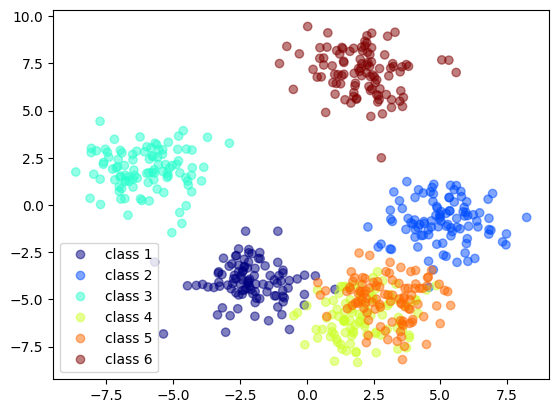

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from utils import generate_clusters, plot

k = 6
df = generate_clusters(k, sd=1.1)
labels = [f"class {i+1}" for i in range(k)]

# Plot true clusters
plot(df, labels)

### K-means Algorithm

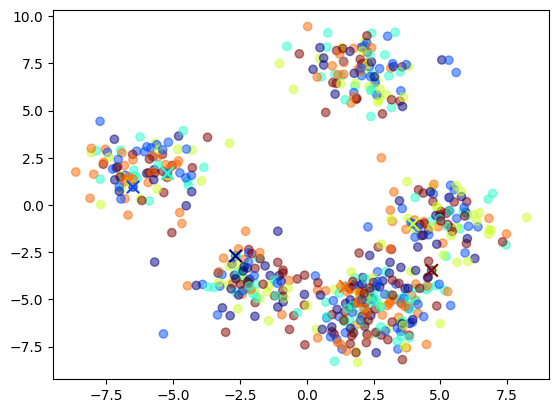

In [19]:
size = len(df)

# Select K points as the initial centroids
indices = [np.random.randint(0, size) for i in range(k)]
centroids = np.array([np.array([df.x[i], df.y[i]]) for i in indices])

# Step 1: randomly assign each point to a centroid
df["cluster"] = np.random.randint(0, k, size)

plt.scatter(df.x, df.y, c=df.cluster, cmap=cm.jet, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=80, c=range(k), cmap=cm.jet)

In [20]:
# For simplicity, we will use the same df to assign a point to the cluster
# this will be the predicted label

def distance(A: np.array, B: np.array, p: int = 2):
    """Calculates the distance between two points using Euclidean distance"""
    return np.sqrt(np.sum((A - B)**p))

max_iter = 100

print(f"======Initial Info=====")
for i in range(k):
    print(f"Centroid {i+1}: ({centroids[i][0]:.2f}, {centroids[i][1]:.2f})")
    print(f"Cluster size: {df[df.cluster == i].cluster.count()}")

# Step 2: Continuously adjust centroids and update clusters
for iter in range(max_iter):

    # Update centroids
    for i in range(k):
        cluster = df[df.cluster == i]
        centroids[i] = np.array([cluster.x.mean(), cluster.y.mean()])

    # Re-assign all points to nearest cluster
    for i in range(size):
        row = df.iloc[i]
        # Get point
        point = np.array([row.x, row.y])
        # Calculate distance to each centroid
        closest_cluster = np.argmin([distance(point, centroids[i]) for i in range(k)])
        # Assign to closest cluster
        df.at[i, "cluster"] = closest_cluster

    # print(f"======Update {iter + 1}=====")
    # for i in range(k):
    #     print(f"Centroid {i+1}: ({centroids[i][0]:.2f}, {centroids[i][1]:.2f})")
    #     print(f"Cluster size: {df[df.cluster == i].cluster.count()}")

print(f"======Final Info=====")
for i in range(k):
    print(f"Centroid {i+1}: ({centroids[i][0]:.2f}, {centroids[i][1]:.2f})")
    print(f"Cluster size: {df[df.cluster == i].cluster.count()}")

======Initial Info=====
Centroid 1: (-2.66, -2.70)
Cluster size: 92
Centroid 2: (-6.49, 0.95)
Cluster size: 96
Centroid 3: (-5.21, 1.68)
Cluster size: 101
Centroid 4: (3.98, -1.01)
Cluster size: 96
Centroid 5: (1.45, -4.31)
Cluster size: 101
Centroid 6: (4.67, -3.46)
Cluster size: 114
======Final Info=====
Centroid 1: (-2.04, -4.12)
Cluster size: 103
Centroid 2: (1.43, 7.77)
Cluster size: 53
Centroid 3: (5.07, -0.88)
Cluster size: 100
Centroid 4: (2.78, 6.19)
Cluster size: 47
Centroid 5: (-6.02, 1.86)
Cluster size: 100
Centroid 6: (2.58, -5.46)
Cluster size: 197


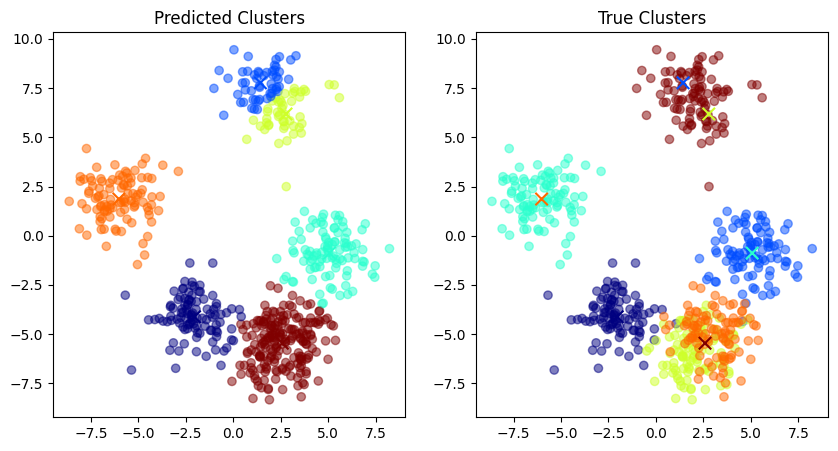

In [21]:
# Side by side comparison
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(df.x, df.y, c=df.cluster, cmap=cm.jet, alpha=0.5)
axs[0].scatter(centroids[:, 0], centroids[:, 1], marker='x', s=80, c=range(k), cmap=cm.jet)
axs[0].set_title("Predicted Clusters")

axs[1].set_title("True Clusters")
axs[1].scatter(df.x, df.y, c=df.label, cmap=cm.jet, alpha=0.5)
axs[1].scatter(centroids[:, 0], centroids[:, 1], marker='x', s=80, c=range(k), cmap=cm.jet)